In [1]:
# Importing important libraries to proceed :
import pandas as pd 
import numpy as np 
import seaborn as sns 
from datetime import datetime
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (16,10)
%matplotlib inline 


In [2]:
#Importing the data to proceed 
data = pd.read_csv('NSE Training Data - 1st Jan 2016 to 1st Jan 2022.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,04-01-2016,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,05-01-2016,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,06-01-2016,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,07-01-2016,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,08-01-2016,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [4]:
data.shape

(1481, 7)

In [5]:
data.isna().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [6]:
data['Close'].isna().sum()

6

In [7]:
data['Close'].mean()

11180.224847986454

In [8]:
data['Close'] = data['Close'].fillna(data['Close'].mean())

In [9]:
data['Close'].isna().sum()

0

In [10]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,04-01-2016,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700.0
1,05-01-2016,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200.0
2,06-01-2016,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100.0
3,07-01-2016,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900.0
4,08-01-2016,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1481 non-null   object 
 1   Open       1475 non-null   float64
 2   High       1475 non-null   float64
 3   Low        1475 non-null   float64
 4   Close      1481 non-null   float64
 5   Adj Close  1475 non-null   float64
 6   Volume     1475 non-null   float64
dtypes: float64(6), object(1)
memory usage: 81.1+ KB


In [12]:
# Lets have the main components for prediction 


In [13]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [14]:
data = data[['Date','Close']]

In [15]:
data

,Date,Close
0,04-01-2016,7791.299805
1,05-01-2016,7784.649902
2,06-01-2016,7741.000000
3,07-01-2016,7568.299805
4,08-01-2016,7601.350098
...,...,...
1476,27-12-2021,17086.250000
1477,28-12-2021,17233.250000
1478,29-12-2021,17213.599610
1479,30-12-2021,17203.949220


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1481 non-null   object 
 1   Close   1481 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.3+ KB


In [17]:
data['Date'] = pd.to_datetime(data['Date'])

In [18]:
data

,Date,Close
0,2016-04-01,7791.299805
1,2016-05-01,7784.649902
2,2016-06-01,7741.000000
3,2016-07-01,7568.299805
4,2016-08-01,7601.350098
...,...,...
1476,2021-12-27,17086.250000
1477,2021-12-28,17233.250000
1478,2021-12-29,17213.599610
1479,2021-12-30,17203.949220


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1481 non-null   datetime64[ns]
 1   Close   1481 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.3 KB


In [20]:
data.columns = ['ds','y']

In [21]:
data.head()

,ds,y
0,2016-04-01,7791.299805
1,2016-05-01,7784.649902
2,2016-06-01,7741.000000
3,2016-07-01,7568.299805
4,2016-08-01,7601.350098


In [22]:
# Lets add Our Model 
from prophet import Prophet

In [23]:
model = Prophet()

In [24]:
len(data)

1481

In [25]:
data.tail()

,ds,y
1476,2021-12-27,17086.25000
1477,2021-12-28,17233.25000
1478,2021-12-29,17213.59961
1479,2021-12-30,17203.94922
1480,2021-12-31,17354.05078


In [26]:
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
future = model.make_future_dataframe(periods=24,freq='B')

In [28]:
future.tail()

,ds
1500,2022-01-28
1501,2022-01-31
1502,2022-02-01
1503,2022-02-02
1504,2022-02-03


In [29]:
len(future)

1505

In [30]:
prediction = model.predict(future)

In [31]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-02,7331.286583,6907.788927,8813.740270,7331.286583,7331.286583,503.489586,503.489586,503.489586,73.514073,73.514073,73.514073,429.975514,429.975514,429.975514,0.0,0.0,0.0,7834.776169
1,2016-01-03,7335.451545,6815.413219,8865.212968,7335.451545,7335.451545,512.454314,512.454314,512.454314,40.575202,40.575202,40.575202,471.879111,471.879111,471.879111,0.0,0.0,0.0,7847.905859
2,2016-01-04,7339.616507,6882.820702,8812.309201,7339.616507,7339.616507,499.940030,499.940030,499.940030,-9.075257,-9.075257,-9.075257,509.015287,509.015287,509.015287,0.0,0.0,0.0,7839.556537
3,2016-01-06,7347.946431,6882.387690,8902.702111,7347.946431,7347.946431,539.353538,539.353538,539.353538,-28.759673,-28.759673,-28.759673,568.113211,568.113211,568.113211,0.0,0.0,0.0,7887.299970
4,2016-01-07,7352.111394,7011.458474,8978.002079,7352.111394,7352.111394,611.297519,611.297519,611.297519,21.434749,21.434749,21.434749,589.862771,589.862771,589.862771,0.0,0.0,0.0,7963.408913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,2022-01-28,18639.375973,17985.166366,19932.616858,18634.624539,18644.773975,319.411814,319.411814,319.411814,-67.116038,-67.116038,-67.116038,386.527852,386.527852,386.527852,0.0,0.0,0.0,18958.787787
1501,2022-01-31,18679.564048,18058.963146,20081.431948,18672.908058,18687.300091,369.303128,369.303128,369.303128,-9.075257,-9.075257,-9.075257,378.378385,378.378385,378.378385,0.0,0.0,0.0,19048.867176
1502,2022-02-01,18692.960073,18057.582398,20070.496479,18685.672325,18701.374781,349.281585,349.281585,349.281585,-30.573056,-30.573056,-30.573056,379.854641,379.854641,379.854641,0.0,0.0,0.0,19042.241658
1503,2022-02-02,18706.356097,18049.147253,20058.677718,18698.680066,18715.653924,354.401453,354.401453,354.401453,-28.759673,-28.759673,-28.759673,383.161126,383.161126,383.161126,0.0,0.0,0.0,19060.757551


In [32]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1500,2022-01-28,18639.375973,17985.166366,19932.616858,18634.624539,18644.773975,319.411814,319.411814,319.411814,-67.116038,-67.116038,-67.116038,386.527852,386.527852,386.527852,0.0,0.0,0.0,18958.787787
1501,2022-01-31,18679.564048,18058.963146,20081.431948,18672.908058,18687.300091,369.303128,369.303128,369.303128,-9.075257,-9.075257,-9.075257,378.378385,378.378385,378.378385,0.0,0.0,0.0,19048.867176
1502,2022-02-01,18692.960073,18057.582398,20070.496479,18685.672325,18701.374781,349.281585,349.281585,349.281585,-30.573056,-30.573056,-30.573056,379.854641,379.854641,379.854641,0.0,0.0,0.0,19042.241658
1503,2022-02-02,18706.356097,18049.147253,20058.677718,18698.680066,18715.653924,354.401453,354.401453,354.401453,-28.759673,-28.759673,-28.759673,383.161126,383.161126,383.161126,0.0,0.0,0.0,19060.757551
1504,2022-02-03,18719.752122,18144.360653,20132.645223,18711.488674,18730.396416,409.511909,409.511909,409.511909,21.434749,21.434749,21.434749,388.077161,388.077161,388.077161,0.0,0.0,0.0,19129.264032


In [33]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [34]:
predicted_output = prediction[['ds','yhat_lower', 'yhat_upper','yhat']]

In [35]:
predicted_output

,ds,yhat_lower,yhat_upper,yhat
0,2016-01-02,6907.788927,8813.740270,7834.776169
1,2016-01-03,6815.413219,8865.212968,7847.905859
2,2016-01-04,6882.820702,8812.309201,7839.556537
3,2016-01-06,6882.387690,8902.702111,7887.299970
4,2016-01-07,7011.458474,8978.002079,7963.408913
...,...,...,...,...
1500,2022-01-28,17985.166366,19932.616858,18958.787787
1501,2022-01-31,18058.963146,20081.431948,19048.867176
1502,2022-02-01,18057.582398,20070.496479,19042.241658
1503,2022-02-02,18049.147253,20058.677718,19060.757551


In [36]:
data

,ds,y
0,2016-04-01,7791.299805
1,2016-05-01,7784.649902
2,2016-06-01,7741.000000
3,2016-07-01,7568.299805
4,2016-08-01,7601.350098
...,...,...
1476,2021-12-27,17086.250000
1477,2021-12-28,17233.250000
1478,2021-12-29,17213.599610
1479,2021-12-30,17203.949220


In [37]:
predicted_output

,ds,yhat_lower,yhat_upper,yhat
0,2016-01-02,6907.788927,8813.740270,7834.776169
1,2016-01-03,6815.413219,8865.212968,7847.905859
2,2016-01-04,6882.820702,8812.309201,7839.556537
3,2016-01-06,6882.387690,8902.702111,7887.299970
4,2016-01-07,7011.458474,8978.002079,7963.408913
...,...,...,...,...
1500,2022-01-28,17985.166366,19932.616858,18958.787787
1501,2022-01-31,18058.963146,20081.431948,19048.867176
1502,2022-02-01,18057.582398,20070.496479,19042.241658
1503,2022-02-02,18049.147253,20058.677718,19060.757551


In [38]:
len(predicted_output)

1505

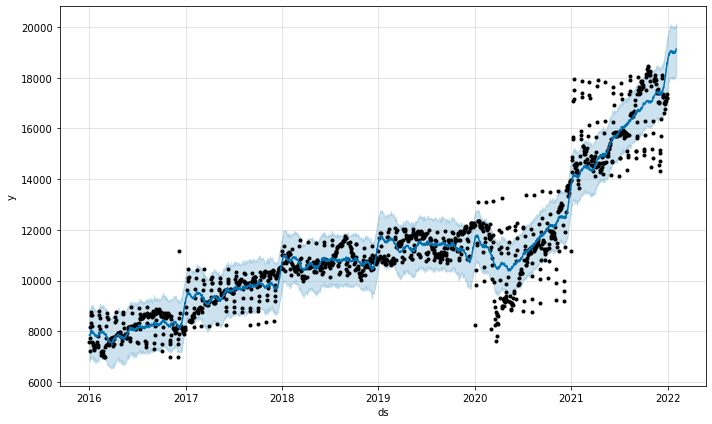

In [62]:
model.plot(predicted_output);

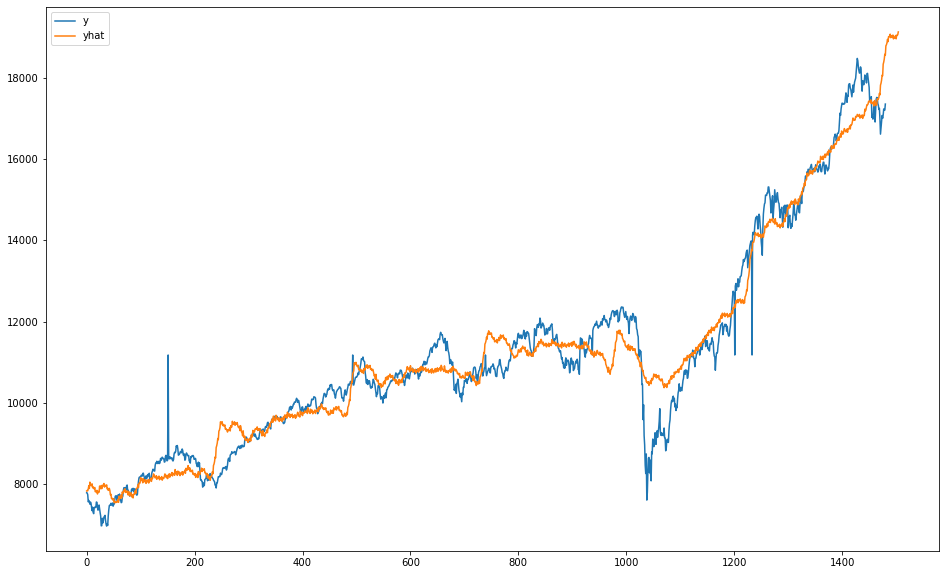

In [63]:
plt.figure(figsize=(16,10))
data['y'].plot()
prediction['yhat'].plot()
plt.legend()


In [41]:
test_data = pd.read_csv('NSE Out of Time Testing Data - 1st Jan 2022 to 4th Feb 2022.csv')

In [42]:
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,17387.150391,17646.650391,17383.300781,17625.699219,17625.699219,200500
1,2022-01-04,17681.400391,17827.599609,17593.550781,17805.250000,17805.250000,247400
2,2022-01-05,17820.099609,17944.699219,17748.849609,17925.250000,17925.250000,251500
3,2022-01-06,17768.500000,17797.949219,17655.550781,17745.900391,17745.900391,236500
4,2022-01-07,17797.599609,17905.000000,17704.550781,17812.699219,17812.699219,239300
5,2022-01-10,17913.300781,18017.449219,17879.150391,18003.300781,18003.300781,232400
6,2022-01-11,17997.750000,18081.250000,17964.400391,18055.750000,18055.750000,220200
7,2022-01-12,18170.400391,18227.949219,18128.800781,18212.349609,18212.349609,245000
8,2022-01-13,18257.000000,18272.250000,18163.800781,18257.800781,18257.800781,303700
9,2022-01-14,18185.000000,18286.949219,18119.650391,18255.750000,18255.750000,229500


In [43]:
test_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [44]:
test_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [45]:
test_data = test_data[['Date','Close']]

In [46]:
test_data

,Date,Close
0,2022-01-03,17625.699219
1,2022-01-04,17805.250000
2,2022-01-05,17925.250000
3,2022-01-06,17745.900391
4,2022-01-07,17812.699219
5,2022-01-10,18003.300781
6,2022-01-11,18055.750000
7,2022-01-12,18212.349609
8,2022-01-13,18257.800781
9,2022-01-14,18255.750000


In [47]:
test_data['Date'] = pd.to_datetime(test_data['Date'])

<ipython-input-47-55312a56aa4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Date'] = pd.to_datetime(test_data['Date'])


In [48]:
test_data

,Date,Close
0,2022-01-03,17625.699219
1,2022-01-04,17805.250000
2,2022-01-05,17925.250000
3,2022-01-06,17745.900391
4,2022-01-07,17812.699219
5,2022-01-10,18003.300781
6,2022-01-11,18055.750000
7,2022-01-12,18212.349609
8,2022-01-13,18257.800781
9,2022-01-14,18255.750000


In [49]:
len(predicted_output)

1505

In [50]:
predicted_output[1481:]

,ds,yhat_lower,yhat_upper,yhat
1481,2022-01-03,17757.333745,19727.323205,18786.460313
1482,2022-01-04,17772.796803,19763.883603,18813.015340
1483,2022-01-05,17901.655566,19864.696855,18857.786970
1484,2022-01-06,17921.646754,19871.563067,18945.738976
1485,2022-01-07,17856.835330,19837.175705,18889.728811
1486,2022-01-10,18001.287340,20002.729875,19015.220199
1487,2022-01-11,18013.709455,20070.942464,19006.923148
1488,2022-01-12,17998.497173,19994.992565,19017.857780
1489,2022-01-13,18032.883756,20101.196112,19073.517921
1490,2022-01-14,18003.641167,19980.465095,18987.245278


In [51]:
comparing_set = predicted_output[1481:]

In [52]:
len(comparing_set)

24

In [53]:
comparing_set.drop(labels=1498,axis=0,inplace=True)

A:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
len(test_data)

23

In [55]:
test_data

,Date,Close
0,2022-01-03,17625.699219
1,2022-01-04,17805.250000
2,2022-01-05,17925.250000
3,2022-01-06,17745.900391
4,2022-01-07,17812.699219
5,2022-01-10,18003.300781
6,2022-01-11,18055.750000
7,2022-01-12,18212.349609
8,2022-01-13,18257.800781
9,2022-01-14,18255.750000


In [56]:
comparing_set

,ds,yhat_lower,yhat_upper,yhat
1481,2022-01-03,17757.333745,19727.323205,18786.460313
1482,2022-01-04,17772.796803,19763.883603,18813.015340
1483,2022-01-05,17901.655566,19864.696855,18857.786970
1484,2022-01-06,17921.646754,19871.563067,18945.738976
1485,2022-01-07,17856.835330,19837.175705,18889.728811
1486,2022-01-10,18001.287340,20002.729875,19015.220199
1487,2022-01-11,18013.709455,20070.942464,19006.923148
1488,2022-01-12,17998.497173,19994.992565,19017.857780
1489,2022-01-13,18032.883756,20101.196112,19073.517921
1490,2022-01-14,18003.641167,19980.465095,18987.245278


In [57]:
comparing_set.columns

Index(['ds', 'yhat_lower', 'yhat_upper', 'yhat'], dtype='object')

In [58]:
cm = comparing_set[['ds','yhat']]

In [59]:
cm

,ds,yhat
1481,2022-01-03,18786.460313
1482,2022-01-04,18813.015340
1483,2022-01-05,18857.786970
1484,2022-01-06,18945.738976
1485,2022-01-07,18889.728811
1486,2022-01-10,19015.220199
1487,2022-01-11,19006.923148
1488,2022-01-12,19017.857780
1489,2022-01-13,19073.517921
1490,2022-01-14,18987.245278


In [60]:
# Evaluation Process 
from sklearn.metrics import mean_squared_error
from math import sqrt

In [61]:
print(sqrt(mean_squared_error(cm['yhat'],test_data['Close'])))

1289.8353311386554
